# Hypothesis Testing in Python

## Hypothesis Testing Fundamentals

### Hypothesis Tests and Z-Scores

In [2]:
import pandas as pd
stack_overflow = pd.read_feather(r'./data/stack_overflow.feather')
stack_overflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


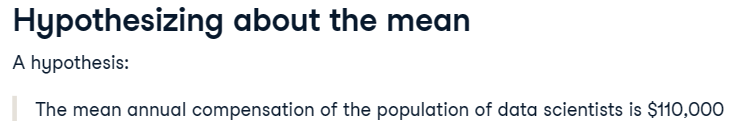

In [3]:
mean_comp_samp = stack_overflow['converted_comp'].mean()
print(f'Calculated mean of compensation {mean_comp_samp:,.2f}')

Calculated mean of compensation 119,574.72


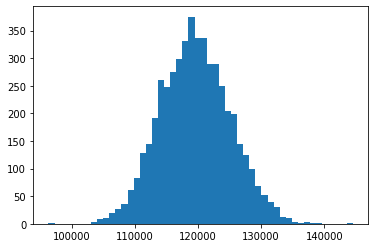

In [4]:
# Generate a bootstrap distribution
import numpy as np
import matplotlib.pyplot as plt
so_boot_distn = [np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp']) for _ in range(5000)]
plt.hist(so_boot_distn, bins=50)
plt.show()

In [5]:
# Standard Error
std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

5527.454706937378


#### Z Score

$$z = {sample stat - hypoth.param.value \over standard error}

In [6]:
# Z Score
mean_comp_hyp = 110000
z_score = (mean_comp_samp - mean_comp_hyp)/std_error
print(z_score)

1.7322109161152457


In [7]:
late_shipments = pd.read_feather(r'./data/late_shipments.feather')
late_shipments.head(3)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.0,4.8,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57


In [8]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()

# Print the results
print(late_prop_samp*100)

6.1


In [9]:
late_shipments_boot_distn = [np.mean(late_shipments.sample(frac=1, replace=True)['late_delivery']) for _ in range(5000)]
late_prop_hyp = 0.06
std_error = np.std(late_shipments_boot_distn, ddof=1)
print(std_error)

0.0075758588772195014


In [10]:
z_score = (late_prop_samp - late_prop_hyp) / std_error
print(z_score)

0.13199823494692944


### p_values

In [11]:
val = 'facebookfac'
dashes = []
n=2
hyp=0
for _ in val[::-1]:
    if hyp==n:
        dashes.extend(['-',_])
        hyp=1
    else:
        dashes.append(_)
        hyp += 1
''.join(dashes[::-1])


'f-ac-eb-oo-kf-ac'

In [12]:
def divide_string(string, parts):
    substrings = [string[::-1][i:i + parts] for i in range(0, len(string), parts)]

    if len(substrings) > parts:
        substrings[-2] += substrings[-1]
        substrings.pop()

    return '-'.join(substrings)

string = "paper"
parts = 3

result = divide_string(string, parts)
print(result)

rep-ap


In [13]:
len(string)

5

In [14]:
import textwrap as tw
string='computercomputercomp'
N=6
lst = '-'.join([_[::-1] for _ in tw.wrap(string[::-1], N)[::-1]])


In [15]:
lst = ['12.0.4.1', '3.3.1.12', '12.0.3.1', '3.1', '12.1', '4.5', '4.4.1', '3.3.1.3', '3.2.1']
result=[]
for number in lst:
    int_parts = [int(part) for part in str(number).split('.')]
    result.append(int_parts)
sorted(result)

[[3, 1],
 [3, 2, 1],
 [3, 3, 1, 3],
 [3, 3, 1, 12],
 [4, 4, 1],
 [4, 5],
 [12, 0, 3, 1],
 [12, 0, 4, 1],
 [12, 1]]

In [16]:
# version_strings = [ 12.0.4.1, 3.3.1.12, 12.0.3.1, 3.1, 12.1, 4.5, 4.4.1, 3.3.1.3, 3.2.1]

# Function to convert version string to a list of integers
def version_key(version):
    return [int(part) for part in str(version).split('.') if part]

# Sort the list using the custom key function
sorted_versions = sorted(lst, key=version_key)

# Output the sorted list
print(sorted_versions)

['3.1', '3.2.1', '3.3.1.3', '3.3.1.12', '4.4.1', '4.5', '12.0.3.1', '12.0.4.1', '12.1']


### p-values

In [20]:
z_score = (late_prop_samp-late_prop_hyp)/std_error
z_score

0.13199823494692944

In [21]:
import scipy.stats as scs
p_value = 1 - scs.norm.cdf(z_score, loc=0, scale=1)
p_value

0.44749284392083466

In [22]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.04697500000000001, 0.076)


In [23]:
late_prop_hyp

0.06

When you have a confidence interval width equal to one minus the significance level,<br>
if the hypothesized population parameter is within the confidence interval,<br>
you should <b>fail to reject</b> the null hypothesis.

### Two-Sample and ANOVA Tests